In [1]:
#Some Import Important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the Data set
df = pd.read_csv("/content/drive/My Drive/move_train.csv")

#Exploring Data Analysis (EDA)

In [3]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
df.tail()

,id,text,genre
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action
22578,28166,"rd walks off down the hallway, leaving his pos...",comedy


In [5]:
df.shape

(22579, 3)

In [6]:
df.dtypes

id        int64
text     object
genre    object
dtype: object

In [7]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

#Cleaning the Data set

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df.columns

Index(['text', 'genre'], dtype='object')

In [10]:
#How to check any nan values
df.dropna().any()

text     True
genre    True
dtype: bool

In [11]:
#Clening the Nan Values
df.dropna(inplace=True)

In [12]:
df.dropna().any()

text     True
genre    True
dtype: bool

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.columns

Index(['text', 'genre'], dtype='object')

#Visulization 

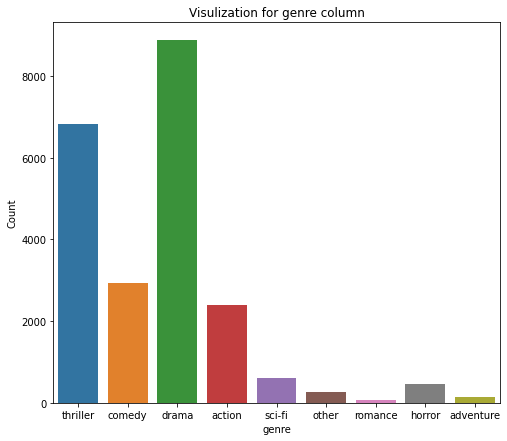

In [15]:
plt.figure(figsize=(8,7))
sns.countplot(x='genre',data=df)
plt.title("Visulization for genre column")
plt.xlabel("genre")
plt.ylabel("Count")
plt.show()

In [16]:
#how to find unique value
df['genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [17]:
#mapping the data set
genre_map = {'thriller':1, 'comedy':2, 'drama':3, 'action':4, 'sci-fi':5, 'other':6,'romance':7, 'horror':8, 'adventure':9}
df['genre'] = df['genre'].map(genre_map)

In [18]:
df.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",1
1,"t, summa cum laude and all. And I'm about to l...",2
2,"up Come, I have a surprise.... She takes him ...",3
3,ded by the two detectives. INT. JEFF'S APARTME...,1
4,"nd dismounts, just as the other children reach...",3


#Cleaning and Preprocessing the Data set

In [19]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the script words
  words = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire script into lower case
  words = words.lower()

  # Tokenizing the script by words
  words = words.split()

  # Removing the stop words
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  words = ' '.join(words)

  # Creating a corpus
  corpus.append(words)

In [21]:
corpus[:15]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [22]:
drama_words = []
for i in list(df[df['genre']==3].index):
  drama_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==2].index):
  comedy_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==4].index):
  action_words.append(corpus[i])

romance_words = []
for i in list(df[df['genre']==7].index):
  romance_words.append(corpus[i])

adventure_words = []
for i in list(df[df['genre']==9].index):
  adventure_words.append(corpus[i])

drama = ''
comedy = ''
action = ''
romance = ''
adventure = ''

for i in range(1, 7):
  drama += drama_words[i]
  comedy += comedy_words[i]
  action += action_words[i]
  romance += romance_words[i]
  adventure += adventure_words[i]

#Word Cloud

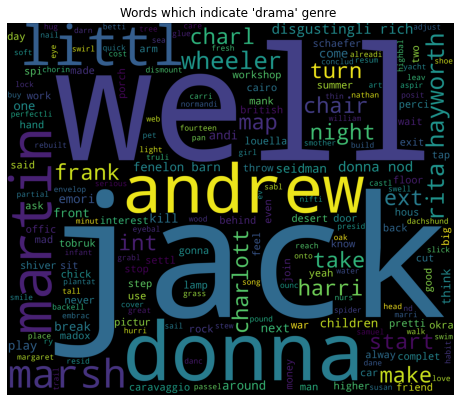

In [23]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='Black', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'drama' genre ")
plt.show()

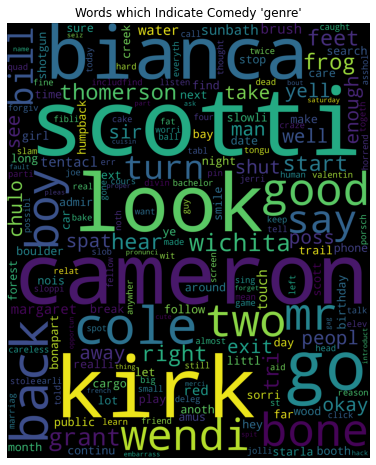

In [24]:
#creating the wordcloud from comedy
from wordcloud import WordCloud
wordcloud2 = WordCloud(background_color='Black', height=3000, width=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.title("Words which Indicate Comedy 'genre'")
plt.axis("off")
plt.show()

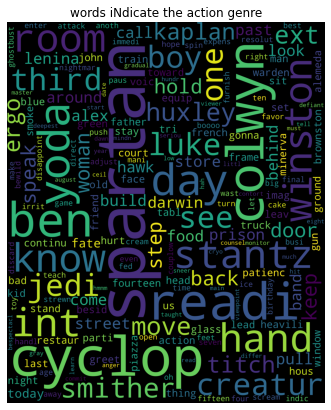

In [25]:
#Creating the wordcloud from action genre
from wordcloud import WordCloud
wordcloud3 = WordCloud(background_color='Black', height=3000, width=2500).generate(action)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud3)
plt.axis("off")
plt.title("words iNdicate the action genre")
plt.show()

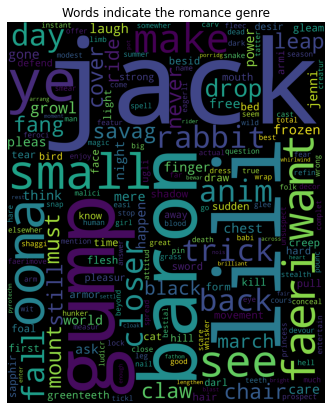

In [26]:
#Creating the wordcloud from romance 'genre'
from wordcloud import WordCloud
wordcloud4 = WordCloud(background_color='Black',height=3000,width=2500).generate(romance)
plt.figure(figsize=(7,7))
plt.title("Words indicate the romance genre")
plt.axis('off')
plt.imshow(wordcloud4)
plt.show()

#Creating the Bag of Words

In [27]:
#Creating Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000,ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [28]:
y = df['genre'].values

In [29]:
y

array([1, 2, 3, ..., 1, 4, 2])

#Model Building

In [30]:
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)
print("Training Size: {}, Test Size{}".format(training_x.shape,test_x.shape))

Training Size: (18063, 10000), Test Size(4516, 10000)


#Multinomial Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
#Predicting the results
y_pred = mnb.predict(test_x)

In [33]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,y_pred)
print("-------Score---------")
print("Accuracy Score is: {}".format(round(score*100,2)))

-------Score---------
Accuracy Score is: 89.57


In [34]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)

In [35]:
cm

array([[1173,   21,   77,   14,   22,    0,    0,   11,    0],
       [  11,  517,   18,    7,    4,    0,    0,    2,    0],
       [ 103,   38, 1607,   42,   11,    3,    1,   21,    1],
       [  11,    8,    6,  450,    0,    0,    0,    1,    0],
       [   8,    2,    7,    2,  112,    0,    0,    1,    0],
       [   0,    0,    1,    1,    0,   62,    0,    2,    0],
       [   0,    0,    0,    1,    0,    0,   10,    0,    0],
       [   3,    1,    4,    1,    0,    0,    0,   73,    0],
       [   1,    0,    1,    2,    0,    0,    0,    0,   41]])

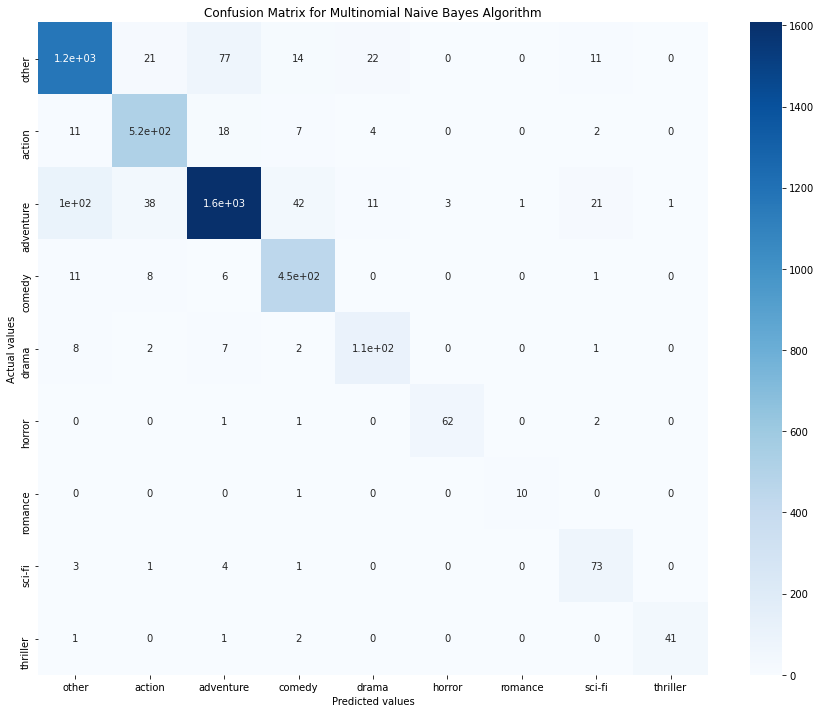

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [37]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_mnb = MultinomialNB(alpha=i)
  temp_mnb.fit(training_x, training_y)
  temp_y_pred = temp_mnb.predict(test_x)
  score = accuracy_score(test_y, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [38]:
mnb = MultinomialNB(alpha=0.1)
mnb.fit(training_x,training_y)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

#Prediction

In [39]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return mnb.predict(temp)[0]

In [40]:
#For generating random integer
from random import randint

In [41]:
# Loading test dataset
test = pd.read_csv('/content/drive/My Drive/move_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [42]:
#shape the of test data set
test.shape

(5589, 2)

In [43]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [44]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: y. Mace, at the bar, sees the Tran Vita Beemer action, looks around for Lenny. Can't find him. But figures there's got to be only one reason Beemer's on the prowl he's looking for Lenny. She whips out her cellular. CUT TO Beemer, grabbing Lenny in a painful come along hold and hustling him toward the back of the club. Lenny's cellular rings. LENNY Can I get that? He reaches for his cellular, connects with... MACE, over by the bar. MACE Hey Lenny, where the hell are you, I think Tran's got Beemer looking for you. BACK TO Lenny, as he's hustled out the rear door. LENNY Thanks for the tip. CUT TO EXT. ALLEY RETINAL FETISH NIGHT Beemer shoves Lenny into the alley and shuts the door behind him. LENNY I recognize you. You're Wade Beemer. Running back for the Rams, am I right? Beemer, who was about to go to work on Lenny, pauses. BEEMER Yeah, that's right. LENNY I saw you play, man. You were good. Like a fucking freight train I remember saying. So what happened, injuries or what? BEEM

In [45]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: side of the room. Finch is sitting on the couch. FINCH Good morning gentleman. JIM Finch! Where were you last night? What happened to the foolproof plan? FINCH I thought a fashionably late entrance would enhance my appearance. off their looks When I got here, the Bacchanalia was over and the nymphs had left. Oz wanders in, still sullen. Takes a seat, sulking. KEVIN Feeling better, Oz? OZ I'm such a loser. KEVIN That's the spirit. We hear FOOTSTEPS coming down the stairs. It's the CENTRAL GIRL. She wears a Central sweatshirt. Sherman follows behind her. The guys watch in disbelief as Sherman and the girl speak hushed, intimately. SHERMAN snippets of conversation ...I'll never forget...thank you. The Central Girl smiles. Notices the other guys watching. Just gives Sherman a kiss on the cheek. CENTRAL GIRL Bye. She exits. The guys are dumbfounded. Jaws hang. Sherman looks triumphant. Strides over to the guys. JIM You did it. SHERMAN Fellas, say goodbye to Chuck Sherman, the boy. I

In [46]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: on! God damn it! INT. STAIRWELL The pushing continues. There's nowhere to go. A boy gets pushed over the balcony, falling to the ground below. INT. BEDROOM Leonard is just a few feet from Jody's leg. Jody and Kenny push closer to the door. Leonard reaches for Jody's leg. He can't quite grab it. Kenny and Jody reach the door. They're almost out. Leonard lungs and grabs Jody's leg. Jody screams out in pain, falls into the crowd. JODY Kenny! Kenny tries to grab for her but he can't reach her. The force of the mob pushes him out the door, through the vortex. INT. UPSTAIRS Kids jam the staircase. There's too many trying to get down at once. Everyone's still pushing. The kids on the staircase can't keep their position and start falling forward, pushing harder. INT. BEDROOM Leonard keeps hold of Jody's leg and pulls her toward him. EXT. BALCONEY Kenny tries to get back to Jody but there's no way he can make headway back into that room. KENNY Jody?! The staircase is now jammed with peo

In [47]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: and for something. And I'm trying to communicate something. JEFF What are you trying to communicate? Tell us. SOOZE So you can give me more shit? JEFF No, no. It's an honest question. What are you trying to communicate? SOOZE I'm trying to communicate how I feel, Jeff. You know raise consciousness. Make people think for a change. BEE BEE Mn hm. JEFF Burger Manifesto, Part One is gonna make people think? SOOZE Yes, you asshole. JEFF About what? SOOZE About things that are important to me. JEFF Like what? SOOZE Sexual politics, racism, the environment, the military industrial... BEE BEE Um hm. JEFF Wait. Racism? You don't know anybody who's black! SOOZE Of course I do! JEFF Name one. SOOZE God, KAREN JOHNSON. JEFF One! SOOZE Your completely missing the point. JEFF Hey! SOOZE I'm talking about idealism. BEE BEE Responsibility, progress. SOOZE Yes. JEFF No, idealism is guilty, middle class bullshit. SOOZE No, sweetie. Cynicism is bullshit. JEFF No, no, no. I'm not being cynical, I'

In [48]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: oyle breaks in, takes a step forward. DOYLE Did you ever own a saw? JEFF Off Well, in the garage, back home, we DOYLE Interrupts And how many people did you cut up with the couple of with it? Or hundred knives you've probably owned in your lifetime? INT. JEFF'S APARTMENT NIGHT SEMI CLOSEUP Jeff, reasoning JEFF But I'm not a killer! DOYLE Off Your logic is backward. Lisa cuts in spiritedly. LISA You can't ignore the wife disappearing! And the trunk and the jewelry ! INT. JEFF'S APARTMENT NIGHT SEMI CLOSEUP Doyle starts to pace up and down, throwing out a hand in careful explanation. DOYLE I checked the railroad station. He bought a ticket. He put her on the train ten minutes later. Destination Merritsville. Witnesses. This deep. He holds his hand a few feet off the floor INT. JEFF'S APARTMENT NIGHT SEMI CLOSEUP Jeff and Lisa. LISA It might have been a woman but it couldn't have been Mrs. Thorwald. That jewelry INT. JEFF'S APARTMENT NIGHT SEMI CLOSEUP Doyle comes up to the CAMERA

In [49]:
#Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_map.keys())[value]))

Script: rvosa can't see the road through the fragmented glass he PUNCHES IT OUT with his fist and FIRES straight out EXT STREET NIGHT GUNFIRE hits the rear TIRE Of the VAN the blowout causes the van to SWERVE WILDLY INT VAN Jim struggles for control of the vehicle JIM Hold on! Jim makes a HARD LEFT TURN EXT STREET NIGHT The van CAREENS over the grass MEDIAN and stabs directly into the OTHER LANE heading the WRONG DIRECTION Barely missing oncoming traffic, the van DARTS INTO AN ALLEY Marvosa sends the stolen car the same way, but in a frantic miscalculation an oncoming CAR SMASHES INTO THEM BROADSIDE The two vehicles SKID a ways, metal SPARKS FLYING from scraping metal They SLAM HARD into the curb CUT TO INT ALLEYWAY NIGHT The van can go no further. Jim and Stephanie get out Jim looks around, grabs Stephanie by the hand The two run down the alley CUT TO INT STOLEN CAR NIGHT Uninjured, Marvosa and Ulysses get their bearings and jump out CUT TO EXT STREET NIGHT The dazed and injured DRIVE